In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_csv('medical_examination.csv')

cardio_0_people=df[(df['cardio']==0)]
cardio_1_people=df[(df['cardio']==1)]

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [110]:
df['bmi']=df['weight']/((df['height']/100)**2)
df['over_weight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)


In [111]:
df['cholesterol']=df['cholesterol'].apply(lambda x:0 if x==1 else 1)
df['gluc']=df['gluc'].apply(lambda x:0 if x==1 else 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,over_weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [112]:
df_melt=df.melt(id_vars=['cardio'],value_vars=['alco','over_weight','smoke','gluc','cholesterol','active'],var_name='variables',value_name='value')
dfgroup=df_melt.groupby(['cardio','variables','value']).size().reset_index(name='total')
dfgroup

,cardio,variables,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,over_weight,0,15915
9,0,over_weight,1,19106


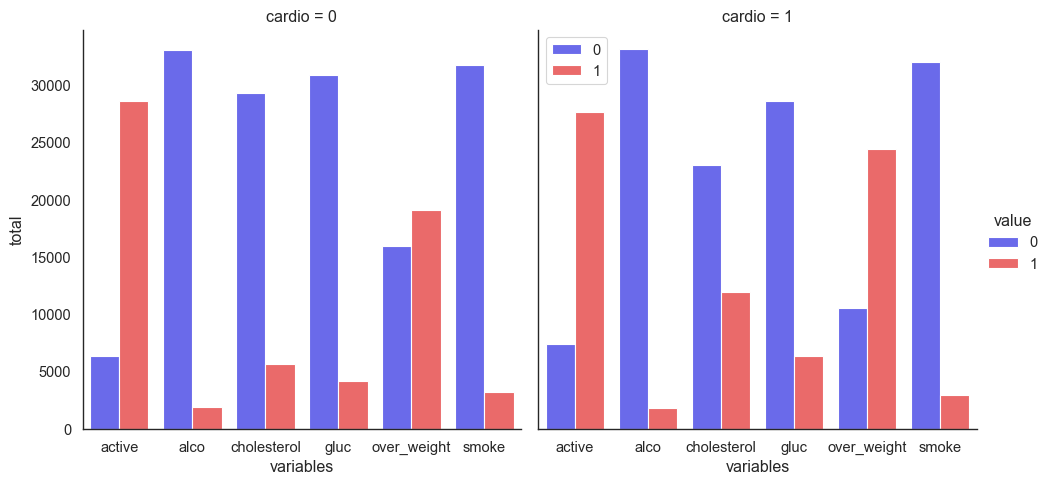

In [113]:
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)
sns.catplot(data=dfgroup,x='variables',y='total',kind='bar',hue='value',col='cardio',palette='seismic')
plt.legend(loc=0)

In [114]:
df.groupby(['alco','over_weight','smoke','gluc','cholesterol','active']).size()

alco  over_weight  smoke  gluc  cholesterol  active
0     0            0      0     0            0          3752
                                             1         14853
                                1            0           476
                                             1          2018
                          1     0            0           175
                                                       ...  
1     1            1      0     1            1           205
                          1     0            0            11
                                             1            77
                                1            0            29
                                             1            94
Length: 64, dtype: int64

<Axes: >

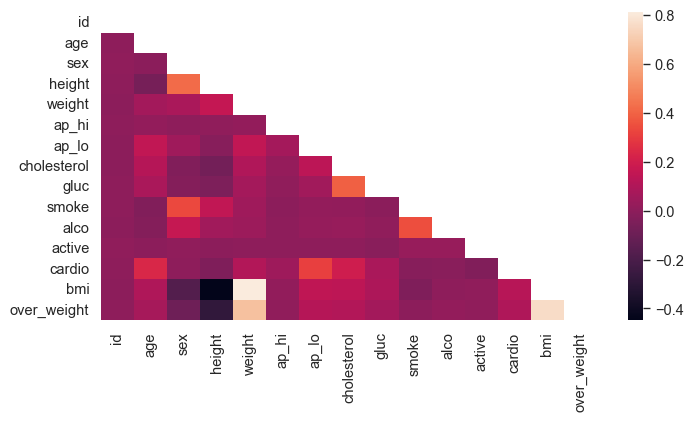

In [125]:
df=df[df['ap_hi']>=df['ap_lo']]
df=df[(df['height']>=df['height'].quantile(0.025))&(df['height']<=df['height'].quantile(0.975))&(df['weight']>=df['weight'].quantile(0.025))&(df['weight']<=df['weight'].quantile(0.975))]
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,4))
sns.heatmap(mask=mask,data=corr)